In [212]:
import pandas as pd
import numpy as np
from pandas import option_context

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk  


#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


#score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

#tools
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split


import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [76]:
df = pd.read_csv('datasets/filtered.csv')

In [77]:
def plot_matrix(estimator, X_train, X_test, y_train, y_test):
    # confusion matrix plot
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5), dpi=100) 
    plt.suptitle('Patients Readmitted Within 30 Days')

    plot_confusion_matrix(estimator, X_train , y_train, ax=ax1, normalize='all')
    ax1.title.set_text('TRAINING')
    ax1.set_xlabel('Predicted'); ax1.set_ylabel('Actual');
    #ax1.xaxis.set_ticklabels(['Yes', 'No']); ax1.yaxis.set_ticklabels(['No', 'Yes']);

    plot_confusion_matrix(estimator, X_test , y_test, ax=ax2, normalize='all')
    ax2.title.set_text('TEST')
    ax2.set_xlabel('Predicted'); ax2.set_ylabel('Actual');
    #ax2.xaxis.set_ticklabels(['Yes', 'No']); ax2.yaxis.set_ticklabels(['No', 'Yes']);

### Test Train Split
___

In [78]:
X = df.review
y = df.sentiment

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Count Vectorizer (Transforming Data)
___

In [80]:
tv = TfidfVectorizer()

In [81]:
X_train = tv.fit_transform(X_train)
X_test = tv.transform(X_test)

#### Baseline LogisticRegression
___

In [82]:
log_baseline = LogisticRegression(solver='liblinear',max_iter=200)
log_baseline.fit(X_train, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [83]:
y_train_predicted = log_baseline.predict(X_train)
accuracy_score(y_train,y_train_predicted)

0.9304962286621675

In [84]:
y_test_predicted = log_baseline.predict(X_test)
accuracy_score(y_test,y_test_predicted)

0.914745299796748

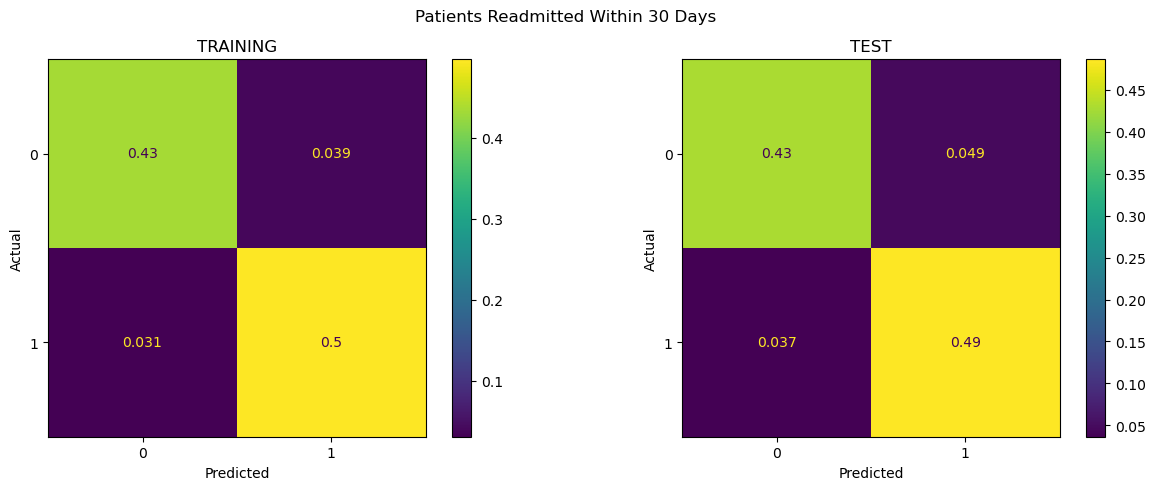

In [85]:
plot_matrix(log_baseline, X_train, X_test, y_train, y_test)

### LogisticRegression (Grid Search)
___

In [21]:
log_estimator = LogisticRegression(n_jobs=-1)

solvers = ['liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)

grid_search = GridSearchCV(estimator=log_estimator, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.910859 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [22]:
grid_result.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [23]:
log = LogisticRegression(n_jobs=-1, C=1.0, max_iter=200, penalty='l2', solver='liblinear')
log.fit(X_train, y_train)

LogisticRegression(max_iter=200, n_jobs=-1, solver='liblinear')

In [24]:
y_train_predicted = log.predict(X_train)
accuracy_score(y_train,y_train_predicted)

0.9305174010850866

In [25]:
y_test_predicted = log.predict(X_test)
accuracy_score(y_test,y_test_predicted)

0.9145865091463414

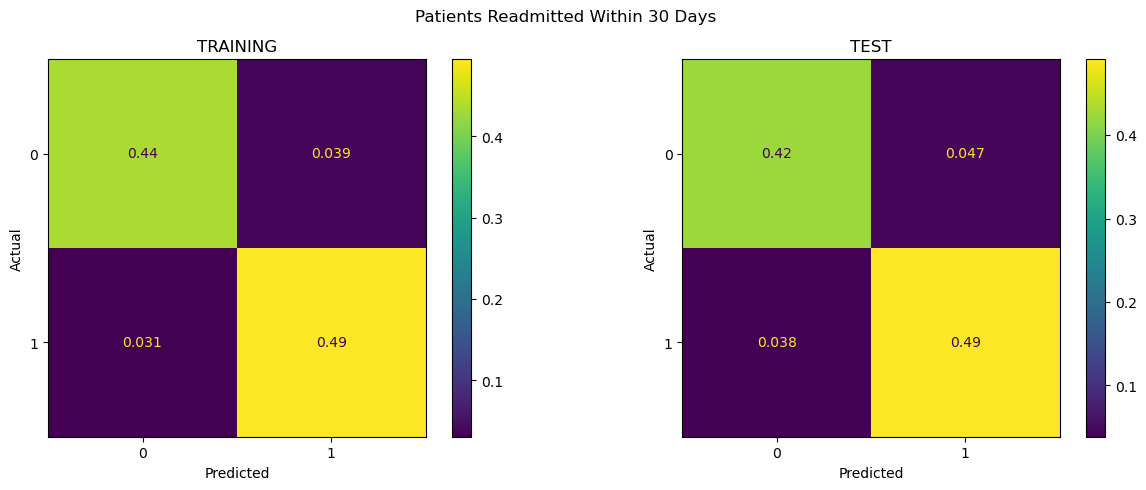

In [26]:
plot_matrix(log_baseline, X_train, X_test, y_train, y_test)

### Naive Bayes
___

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
nbc = MultinomialNB()
nbc.fit(X_train, y_train)

MultinomialNB()

In [46]:
y_train_predicted = nbc.predict(X_train)
accuracy_score(y_train,y_train_predicted)

0.8999708879184861

In [47]:
y_test_predicted = nbc.predict(X_test)
accuracy_score(y_test,y_test_predicted)

0.882129700203252

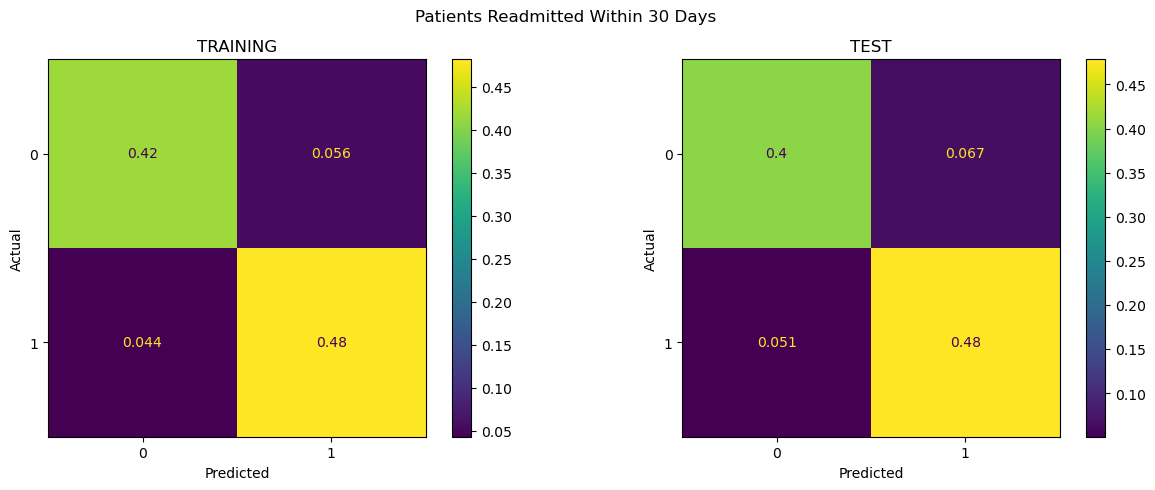

In [31]:
plot_matrix(nbc, X_train, X_test, y_train, y_test)

### Naive Bayes (Grid Search)
___

In [32]:
nbc_estimator = MultinomialNB()

alpha = [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1.0]

grid = dict(alpha=alpha)

grid_search = GridSearchCV(estimator=nbc_estimator, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.879831 using {'alpha': 1.0}


### Decision Tree Baseline
___

In [209]:
dtc_baseline = DecisionTreeClassifier(random_state=45, max_depth=10)
dtc_baseline.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=45)

In [210]:
y_train_predicted = dtc_baseline.predict(X_train)
accuracy_score(y_train,y_train_predicted)

0.7552997221119492

In [211]:
y_test_predicted = dtc_baseline.predict(X_test)
accuracy_score(y_test,y_test_predicted)

0.7437595274390244

### XG BOOST Baseline
___

In [213]:
xg_baseline = XGBClassifier(eval_metric='mlogloss')
xg_baseline.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [214]:
y_train_predicted = xg_baseline.predict(X_train)
accuracy_score(y_train,y_train_predicted)

0.9004790260685457

In [215]:
y_test_predicted = xg_baseline.predict(X_test)
accuracy_score(y_test,y_test_predicted)

0.879223831300813

## SAVE MODEL

In [120]:
import pickle

In [121]:
pickle.dump(tv, open('tfidf_transformer.pkl','wb'))

In [122]:
pickle.dump(log_baseline, open('log_model.pkl','wb'))

In [169]:
model_file = 'log_model.pkl'
transforms_file = 'tfidf_transformer.pkl'

model = pickle.load(open(model_file, 'rb'))
transformer = pickle.load(open(transforms_file, 'rb'))

data = ['''

season watchable rest tedious slow waiting time well episode easily skip plot forward episode entire plot catch fly see fanboy try defend episode possible way excuse episode suck overall break bad slow boring overrated series
''']
vector = transformer.transform(data)
prediction = model.predict_proba(vector)